In [1]:
import pandas as pd
from bettools import get_data, generate_seasons, calculate_poisson_match_outcomes, calculate_ev_from_odds, kelly_criterion
import matplotlib.pyplot as plt
import numpy as np

pd.set_option("display.max_columns", None)
pd.set_option("display.width", None)
pd.options.mode.chained_assignment = None

In [2]:
leagues = ['E0']

season_list = generate_seasons(2018, 2019)

df_ls = get_data(season_list, leagues)

main_df = pd.concat(df_ls)

main_df

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,PSH,PSD,PSA,home_max_odds,away_max_odds,draw_max_odds
0,E0,2018-08-10,Man United,Leicester,2,1,1.58,3.93,7.50,1.58,7.50,4.00
1,E0,2018-08-11,Bournemouth,Cardiff,2,0,1.89,3.63,4.58,1.91,4.75,3.63
2,E0,2018-08-11,Fulham,Crystal Palace,0,2,2.50,3.46,3.00,2.50,3.00,3.46
3,E0,2018-08-11,Huddersfield,Chelsea,0,3,6.41,4.02,1.62,6.50,1.62,4.02
4,E0,2018-08-11,Newcastle,Tottenham,1,2,3.83,3.57,2.08,3.90,2.10,3.57
...,...,...,...,...,...,...,...,...,...,...,...,...
375,E0,2019-05-12,Liverpool,Wolves,2,0,1.31,5.77,10.54,1.31,11.50,6.00
376,E0,2019-05-12,Man United,Cardiff,0,2,1.28,6.33,10.21,1.29,11.00,6.50
377,E0,2019-05-12,Southampton,Huddersfield,1,1,1.44,4.83,7.62,1.44,8.50,4.83
378,E0,2019-05-12,Tottenham,Everton,2,2,2.10,3.64,3.64,2.20,3.70,3.64


In [3]:
home_bet_df = main_df[main_df['home_max_odds']>main_df['PSH']]

home_bet_df.reset_index(inplace=True, drop=True)

home_bet_df.sort_values('Date',inplace=True)

home_bet_df['profit'] = np.where(home_bet_df['FTHG']>home_bet_df['FTAG'], home_bet_df['home_max_odds']-1, -1)

home_bet_df.reset_index(inplace=True, drop=True)

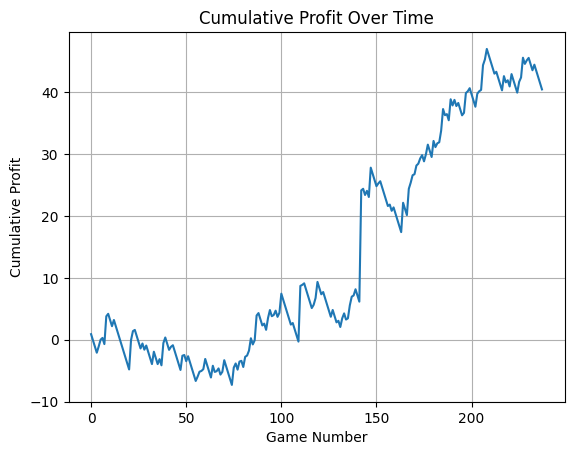

In [6]:
# Assuming 'home_bet_df' is your DataFrame and it has a 'profit' column
home_bet_df['profit'].cumsum().plot()

# Customizations
plt.title('Cumulative Profit Over Time')
plt.xlabel('Game Number')
plt.ylabel('Cumulative Profit')
plt.grid(True)

# Show the plot
plt.show()

In [5]:
leagues = ['E0','E1','E2','E3','SC0','SC1','SC2','D1','D2','I1','I2','SP1','SP2','F1','F2','N1','B1','P1','T1','G1']

season_list = generate_seasons(2016, 2024)

df_ls = get_data(season_list, leagues)

In [7]:
main_df = pd.concat(df_ls)

In [8]:
home_bet_df = main_df[main_df['home_max_odds']>main_df['PSH']]

home_bet_df.reset_index(inplace=True, drop=True)

home_bet_df.sort_values('Date',inplace=True)

home_bet_df['profit'] = np.where(home_bet_df['FTHG']>home_bet_df['FTAG'], home_bet_df['home_max_odds']-1, -1)

home_bet_df.reset_index(inplace=True, drop=True)

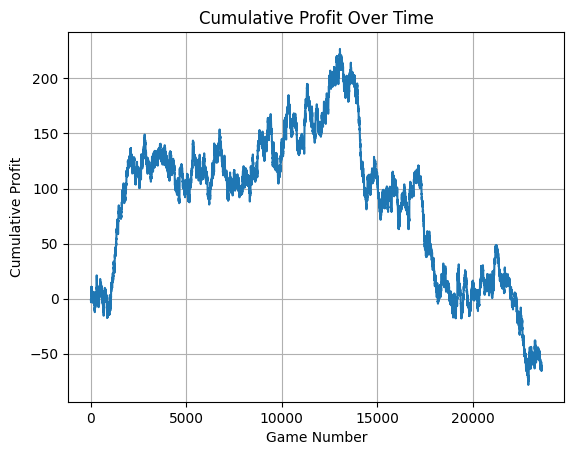

In [9]:
home_bet_df['profit'].cumsum().plot()

# Customizations
plt.title('Cumulative Profit Over Time')
plt.xlabel('Game Number')
plt.ylabel('Cumulative Profit')
plt.grid(True)

# Show the plot
plt.show()

In [10]:
home_bet_df["P_margin"] = (
    1 / home_bet_df["PSH"] + 1 / home_bet_df["PSD"] + 1 / home_bet_df["PSA"]
) - 1

home_bet_df["fair_PSH"] = (3 * home_bet_df["PSH"]) / (
    3 - home_bet_df["P_margin"] * home_bet_df["PSH"]
)
home_bet_df["fair_PSD"] = (3 * home_bet_df["PSD"]) / (
    3 - home_bet_df["P_margin"] * home_bet_df["PSD"]
)
home_bet_df["fair_PSA"] = (3 * home_bet_df["PSA"]) / (
    3 - home_bet_df["P_margin"] * home_bet_df["PSA"]
)

home_bet_df['pinnacle_prob'] = 1/home_bet_df['fair_PSH']

home_bet_df["home_ev"] = home_bet_df.apply(
    lambda x: calculate_ev_from_odds(x["home_max_odds"], x["pinnacle_prob"]), axis=1
)

<Axes: >

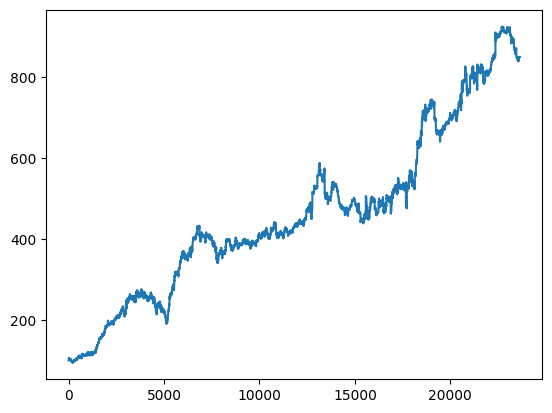

In [21]:
bankroll = 100

for i in range(len(home_bet_df)):
    bet_size = kelly_criterion(
        home_bet_df.loc[i]["pinnacle_prob"], home_bet_df.loc[i]["home_max_odds"], bankroll, 0.25
    )
    home_bet_df.loc[i, 'bet_size'] = bet_size
    bankroll = bankroll - bet_size
    if home_bet_df.loc[i]["FTHG"] > home_bet_df.loc[i]["FTAG"]:
        bankroll = bankroll + bet_size * home_bet_df.loc[i]["home_max_odds"]
    home_bet_df.loc[i, "bankroll"] = bankroll

home_bet_df.bankroll.plot()

In [22]:
home_bet_df

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,PSH,PSD,PSA,home_max_odds,away_max_odds,draw_max_odds,profit,P_margin,fair_PSH,fair_PSD,fair_PSA,pinnacle_prob,home_ev,bet_size,bankroll
0,F2,2016-07-29,Nimes,Laval,0.0,0.0,2.25,3.06,3.93,2.30,3.93,3.20,-1.00,0.025695,2.294212,3.142357,4.066892,0.435880,0.002523,0.048517,99.951483
1,B1,2016-07-30,Charleroi,Waasland-Beveren,1.0,0.0,1.63,4.08,6.08,1.65,6.08,4.08,0.65,0.023069,1.650690,4.212149,6.378196,0.605807,-0.000418,0.000000,99.951483
2,B1,2016-07-30,Mouscron,Anderlecht,1.0,2.0,4.07,3.69,1.96,4.20,1.96,3.69,-1.00,0.026907,4.224200,3.816303,1.995072,0.236731,-0.005729,0.000000,99.951483
3,B1,2016-07-31,Kortrijk,Gent,1.0,1.0,3.43,3.46,2.25,3.50,2.25,3.46,-1.00,0.025007,3.530955,3.562755,2.293006,0.283210,-0.008767,0.000000,99.951483
4,B1,2016-07-31,Westerlo,Standard,2.0,2.0,4.70,3.84,1.81,4.75,1.85,3.84,-1.00,0.025669,4.896927,3.970454,1.838472,0.204210,-0.030004,0.000000,99.951483
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23623,SP2,2024-06-02,Eibar,Oviedo,4.0,3.0,1.93,2.97,4.56,1.95,4.56,3.30,0.95,0.074133,2.026656,3.205239,5.139086,0.493424,-0.037824,0.000000,849.002141
23624,SP2,2024-06-02,Eldense,Sp Gijon,0.0,1.0,5.35,3.97,1.56,5.50,1.57,4.10,-1.00,0.079831,6.238083,4.438941,1.627563,0.160306,-0.118319,0.000000,849.002141
23625,SP2,2024-06-02,Espanol,Cartagena,3.0,0.0,1.40,4.42,7.10,1.46,8.00,4.42,0.46,0.081375,1.455264,5.022115,8.793526,0.687161,0.003255,1.501710,849.692927
23626,SP2,2024-06-02,Leganes,Elche,2.0,0.0,1.56,2.97,9.48,1.57,9.48,3.40,0.57,0.083211,1.630554,3.236631,12.862040,0.613289,-0.037137,0.000000,849.692927


In [28]:
kelly_criterion(0.605807, 1.6, 100, 0.25)

0.0

In [29]:
kelly_criterion(0.435880, 2.3, 100, 1)

0.19415384615384393